<a href="https://colab.research.google.com/github/ojan0319/HousePredict/blob/main/Tugas_Data_Science_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Knowing the size of the dataset

In [ ]:
df.shape

(21613, 21)

## Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Fitur Kolom:
1. id - ID unik untuk setiap rumah yang dijual
2. date - Tanggal penjualan rumah
3. price - Harga setiap rumah yang dijual
4. bedrooms - Jumlah kamar tidur
5. bathrooms - Jumlah kamar mandi, di mana nilai 0.5 berarti toilet tetapi tidak ada shower
6. sqft_living - Luas persegi dari bangunan dalam
7. sqft_lot - Luas persegi dari halaman
8. floors - Jumlah lantai
9. waterfront - Variabel tiruan untuk apakah apartemen itu menghadap ke tepi laut atau tidak
10. view - Indeks dari 0 hingga 4 tentang seberapa bagus tampilan properti itu
11. condition - Indeks dari 1 hingga 5 pada kondisi apartemen
12. grade - Indeks dari 1 hingga 13, di mana 1-3 gagal dalam konstruksi dan desain bangunan, 7 memiliki tingkat konstruksi dan desain rata-rata, dan 11-13 memiliki tingkat kualitas konstruksi dan desain yang tinggi.
13. sqft_above - Luas persegi dari lantai atas bangunan
14. sqft_basement - Luas persegi dari bangunan bawah tanah
15. yr_built - Tahun pertama rumah itu dibangun
16. yr_renovated - Tahun renovasi terakhir rumah
17. zipcode - Area kode pos di mana rumah itu berada
18. lat - Lintang
19. long - Bujur
20. sqft_living15 - Luas persegi bangunan dalam dari 15 tetangga terdekat
21. sqft_lot15 - Luas persegi halaman dari 15 tetangga terdekat


## Handling missing value

In [ ]:
print("BEFORE HANDLING")
df.isna().sum()

BEFORE HANDLING


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
print("AFTER HANDLING")
df.dropna(axis=0, inplace=True)
df.isna().sum()

AFTER HANDLING


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Handling duplicate data

In [ ]:
df.duplicated().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

## Data Preprocessing

In [ ]:
nums = [data for data in dict(df.dtypes) if dict(df.dtypes)[data] in ['float64', 'int64']]
strs = [data for data in dict(df.dtypes) if dict(df.dtypes)[data] in ['object']]

In [ ]:
#statistik data numerik
#df[nums].describe()
#df.describe().transpose()
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,21611.000000,4580327368.923002,2876591655.896095,1000102.000000,2123049307.000000,3904930410.000000,7308900467.500000,9900000190.000000
price,21611.000000,540085.026514,367143.049258,75000.000000,321725.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21611.000000,3.370830,0.930092,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21611.000000,2.114791,0.770157,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,21611.000000,2079.853454,918.422406,290.000000,1426.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21611.000000,15107.713387,41422.347202,520.000000,5040.000000,7618.000000,10688.500000,1651359.000000
floors,21611.000000,1.494332,0.540003,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21611.000000,0.007542,0.086521,0.000000,0.000000,0.000000,0.000000,1.000000
view,21611.000000,0.234325,0.766350,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21611.000000,3.409421,0.650755,1.000000,3.000000,3.000000,4.000000,5.000000


In [ ]:
#informasi data string/objek
df[strs].describe()

,date
count,21611
unique,372
top,20140623T000000
freq,142


In [ ]:
for col in nums:
    print(f'''Value count pada kolom {col}:''')
    print('==================================')
    print(df[col].value_counts())
    print()
    print('==================================')

Value count pada kolom id:
795000620     3
7983000200    2
3293700496    2
8945100320    2
7520000695    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21434, dtype: int64

Value count pada kolom price:
450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
1362500.0      1
957500.0       1
298800.0       1
265900.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

Value count pada kolom bedrooms:
3     9823
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Value count pada kolom bathrooms:
2.50    5379
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10


In [ ]:
for col in strs:
    print(f'''Value count pada kolom {col}:''')
    print('==================================')
    print(df[col].value_counts())
    print()
    print('==================================')

Value count pada kolom date:
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64



In [ ]:
#fitur tiap properti (dalam kolom)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df['bathrooms'] = df['bathrooms'].astype(int)

In [ ]:
df_new = df.drop(columns=['id', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 
                          'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode',
                          'lat', 'long', 'sqft_living15', 'sqft_lot15'])
df_new.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

## Exploratory Data Analysis

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


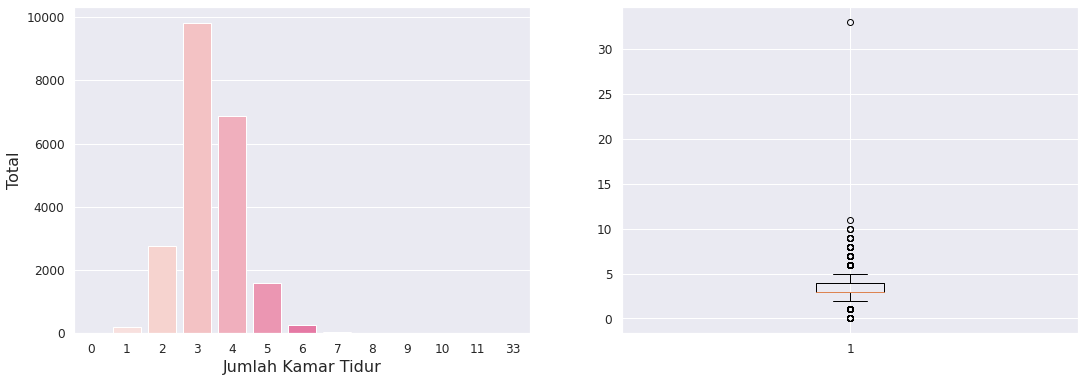

In [ ]:
fig = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

fig.add_subplot(1,2,1)
p = sns.countplot(df_new['bedrooms'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Jumlah Kamar Tidur', fontsize=16)

fig.add_subplot(1,2,2)
plt.boxplot(df_new['bedrooms'])
    
plt.show()

In [ ]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['bedrooms'], .25)
Q2 = np.quantile(df_new['bedrooms'], .50)
Q3 = np.quantile(df_new['bedrooms'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['bedrooms'])
nilai_max = np.max(df_new['bedrooms'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  3.0
Kuartil 2 =  3.0
Kuartil 3 =  4.0
IQR =  1.0
IQR minimum =  1.5
IQR maksimum =  5.5
Nilai minimum data =  0
Nilai maksimum data =  33


In [ ]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Ditemukan low outlier!
Ditemukan high outlier!


In [ ]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['bedrooms']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
High outlier : 
 [6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 8, 8, 9, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 8, 6, 6,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


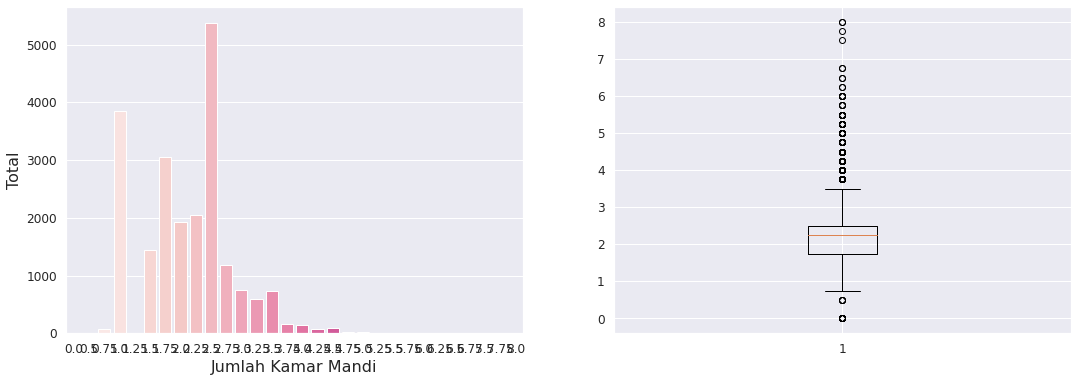

In [ ]:
fig = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

fig.add_subplot(1,2,1)
p = sns.countplot(df_new['bathrooms'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Jumlah Kamar Mandi', fontsize=16)

fig.add_subplot(1,2,2)
plt.boxplot(df_new['bathrooms'])
    
plt.show()

In [ ]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['bathrooms'], .25)
Q2 = np.quantile(df_new['bathrooms'], .50)
Q3 = np.quantile(df_new['bathrooms'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['bathrooms'])
nilai_max = np.max(df_new['bathrooms'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  1.75
Kuartil 2 =  2.25
Kuartil 3 =  2.5
IQR =  0.75
IQR minimum =  0.625
IQR maksimum =  3.625
Nilai minimum data =  0.0
Nilai maksimum data =  8.0


In [ ]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Ditemukan low outlier!
Ditemukan high outlier!


In [ ]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['bathrooms']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0]
High outlier : 
 [4.5, 4.0, 4.0, 4.75, 5.0, 4.25, 4.5, 4.25, 3.75, 5.0, 4.0, 4.0, 4.25, 4.25, 4.25, 4.5, 4.5, 3.75, 4.5, 4.0, 4.5, 5.25, 4.0, 3.75, 4.5, 4.5, 4.25, 6.0, 3.75, 4.25, 4.0, 3.75, 3.75, 4.75, 5.0, 3.75, 3.75, 3.75, 5.0, 4.25, 3.75, 4.0, 4.25, 4.5, 3.75, 4.0, 3.75, 5.0, 3.75, 4.0, 3.75, 3.75, 4.25, 4.0, 4.25, 4.25, 4.5, 3.75, 4.0, 3.75, 5.0, 3.75, 4.0, 5.0, 5.0, 4.5, 5.5, 4.25, 4.0, 4.5, 3.75, 3.75, 4.5, 3.75, 5.5, 4.25, 5.5, 5.25, 4.25, 4.0, 4.5, 3.75, 3.75, 3.75, 3.75, 4.25, 4.5, 4.75, 3.75, 3.75, 3.75, 3.75, 3.75, 4.5, 4.25, 4.0, 4.75, 4.75, 3.75, 4.5, 4.0, 3.75, 3.75, 4.0, 4.0, 3.75, 4.75, 4.5, 3.75, 6.75, 6.0, 4.5, 5.5, 4.5, 3.75, 4.0, 4.25, 3.75, 5.75, 3.75, 4.0, 4.0, 4.0, 5.25, 4.75, 4.0, 4.25, 3.75, 4.0, 4.0, 5.25, 3.75, 3.75, 3.75, 4.5, 5.0, 3.75, 3.75, 4.5, 4.0, 3.75, 3.75, 4.0, 4.75, 3.75, 4.25, 5.0, 3.75, 4.0, 4.25, 4.0, 4.0, 4.5, 4.75, 4.0, 4.0, 4.0, 4.5, 3.75, 3.75, 4.5, 5.75

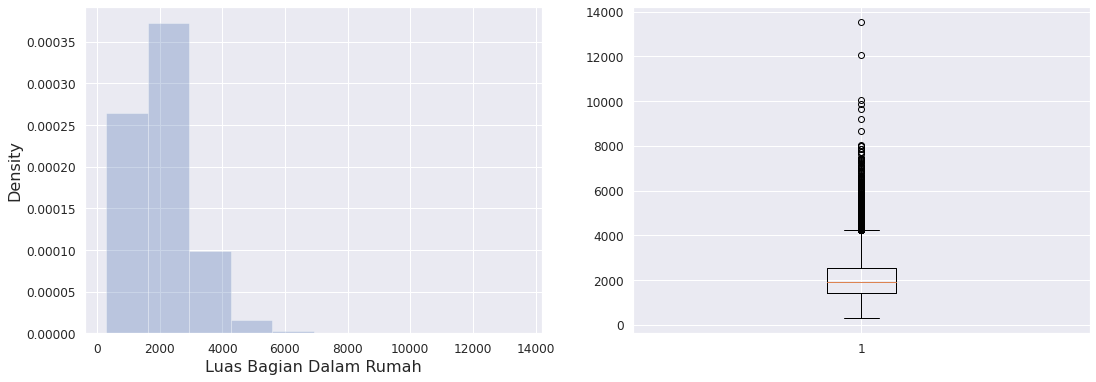

In [ ]:
f = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

f.add_subplot(1,2,1)
# df_new['sqft_living'].plot(kind='kde')
df_new['sqft_living'].hist(density=True, alpha=0.3)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Luas Bagian Dalam Rumah', fontsize=16)

f.add_subplot(1,2,2)
plt.boxplot(df_new['sqft_living'])
plt.show()

In [ ]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['sqft_living'], .25)
Q2 = np.quantile(df_new['sqft_living'], .50)
Q3 = np.quantile(df_new['sqft_living'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['sqft_living'])
nilai_max = np.max(df_new['sqft_living'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  1426.0
Kuartil 2 =  1910.0
Kuartil 3 =  2550.0
IQR =  1124.0
IQR minimum =  -260.0
IQR maksimum =  4236.0
Nilai minimum data =  290
Nilai maksimum data =  13540


In [ ]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Ditemukan high outlier!


In [ ]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['sqft_living']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 []
High outlier : 
 [5420, 4770, 4380, 5180, 4410, 5050, 5310, 4550, 4290, 4290, 4800, 6070, 4870, 4860, 4860, 4410, 4760, 6050, 4740, 5403, 4380, 4640, 6050, 4370, 4570, 4670, 4860, 4270, 4890, 4390, 4250, 5670, 4475, 6070, 4300, 4390, 8010, 4460, 4610, 4380, 4250, 4930, 7390, 4640, 5320, 8000, 6563, 4740, 5450, 4440, 4830, 4280, 4570, 4370, 5710, 5620, 5774, 4470, 4490, 5040, 5770, 5180, 6400, 4490, 6055, 4250, 6300, 4350, 4460, 4340, 4250, 5110, 4700, 4910, 4750, 6840, 4930, 5180, 5130, 6640, 5740, 7350, 4510, 4300, 4870, 5020, 4740, 5370, 4860, 6930, 6550, 6110, 4883, 5010, 4660, 4600, 4910, 5410, 4270, 4520, 5340, 5230, 5370, 4730, 4430, 5780, 6240, 10040, 4250, 5360, 4610, 7480, 5620, 4340, 7080, 5760, 4400, 4280, 9200, 4320, 4420, 4380, 4580, 5310, 4660, 4300, 4240, 5180, 6810, 4690, 5830, 4930, 5700, 5990, 5070, 4750, 4270, 4750, 5040, 4890, 4350, 4280, 6390, 4570, 4350, 4410, 4430, 4720, 5450, 4470, 6410, 6330, 4250, 4290, 5860, 5990, 4260, 4360, 4370, 4440, 49

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


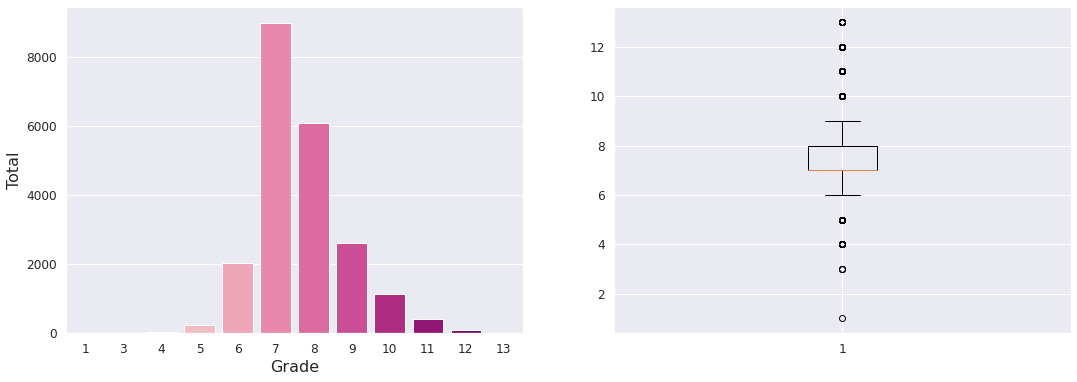

In [ ]:
fig = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

fig.add_subplot(1,2,1)
p = sns.countplot(df_new['grade'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Grade', fontsize=16)

fig.add_subplot(1,2,2)
plt.boxplot(df_new['grade'])
    
plt.show()

In [ ]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['grade'], .25)
Q2 = np.quantile(df_new['grade'], .50)
Q3 = np.quantile(df_new['grade'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['grade'])
nilai_max = np.max(df_new['grade'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  7.0
Kuartil 2 =  7.0
Kuartil 3 =  8.0
IQR =  1.0
IQR minimum =  5.5
IQR maksimum =  9.5
Nilai minimum data =  1
Nilai maksimum data =  13


In [ ]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Ditemukan low outlier!
Ditemukan high outlier!


In [ ]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['grade']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 [5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 1, 5]
High outlier : 
 [11, 10, 11, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 11, 11, 10, 10, 10, 11, 11, 10, 10, 10, 11, 10, 10, 12, 11, 10, 10, 10, 10, 10, 

In [ ]:
df_new['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [ ]:
df_new['grade_cat'] = df.apply(
    lambda x: 'Di atas 6' if x['grade'] > 6
    else 'Di bawah 6', axis=1)

In [ ]:
df_new['grade_cat'].value_counts()

Di atas 6     19298
Di bawah 6     2313
Name: grade_cat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


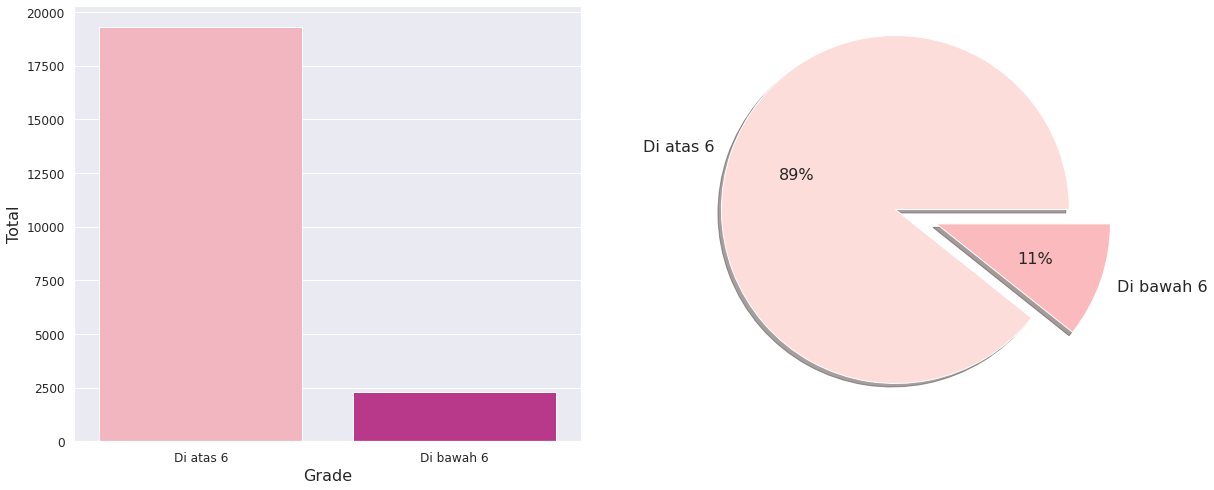

In [ ]:
f = plt.figure(figsize=(20,8))

sns.set(font_scale=1.1)

f.add_subplot(1,2,1)
p = sns.countplot(df_new['grade_cat'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Grade', fontsize=16)

f.add_subplot(1,2,2)
labels = df_new['grade_cat'].unique()
colors = sns.color_palette('RdPu')

grade = df_new['grade_cat'].value_counts()
plt.pie(grade, labels=labels, autopct='%.0f%%', 
        explode=[0.25, 0], colors=colors, shadow=True, textprops={'fontsize': 16})
    
plt.show()

In [ ]:
#tahun properti dibangun
df_new['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1921, 1969, 1947, 1968, 1985, 1941,
       1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984,
       2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973, 1925,
       1989, 1972, 1916, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [ ]:
df_new['yr_built_cat'] = df.apply(
    lambda x: 'Di atas tahun 2000' if x['yr_built'] > 2000
    else 'Di bawah tahun 2000', axis=1)

In [ ]:
df_new['yr_built_cat'].value_counts()

Di bawah tahun 2000    17070
Di atas tahun 2000      4541
Name: yr_built_cat, dtype: int64

In [ ]:
f = plt.figure(figsize=(20,8))

sns.set(font_scale=1.1)

f.add_subplot(1,2,1)
p = sns.countplot(df_new['yr_built_cat'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Tahun Bangunan', fontsize=16)

f.add_subplot(1,2,2)
labels = df_new['yr_built_cat'].unique()
colors = sns.color_palette('RdPu')

grade = df_new['yr_built_cat'].value_counts()
plt.pie(grade, labels=labels, autopct='%.0f%%', 
        explode=[0.25, 0], colors=colors, 
        shadow=True, textprops={'fontsize': 16})

plt.show()

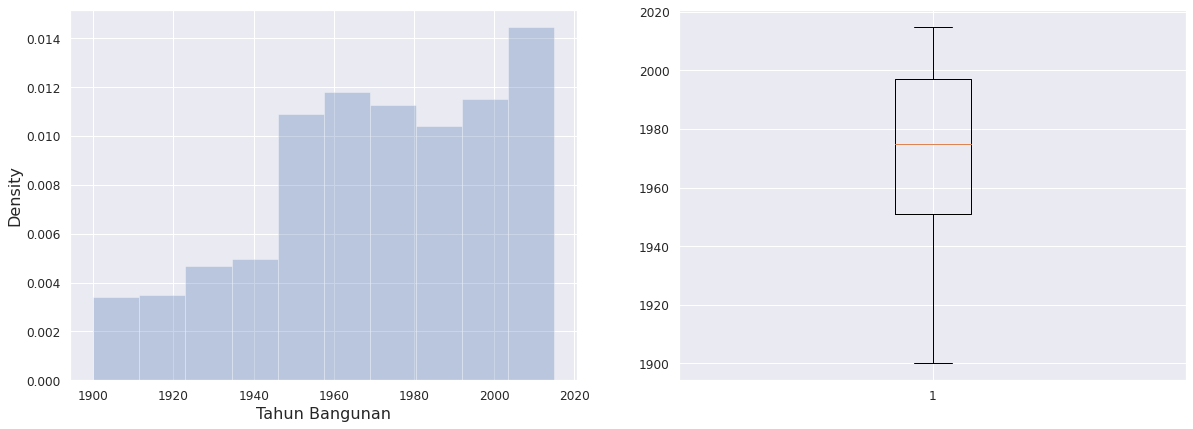

In [ ]:
g = plt.figure(figsize=(20,15))

sns.set(font_scale=1.1)

g.add_subplot(2,2,1)
df_new['yr_built'].hist(density=True, alpha=0.3)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Tahun Bangunan', fontsize=16)

g.add_subplot(2,2,2)
plt.boxplot(df_new['yr_built'])

plt.show()

In [ ]:
#Count Plots
def countPlotter(dataset):
    """
    This function will take dataset and will create a countplot for each column in the dataset with price column
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(len(dataset.columns)), desc = 'Generating Count Plots'):
        if not dataset.columns[i] == 'price':
            fig.add_subplot(np.ceil(len(dataset.columns)/2), 2, i)
            sns.countplot(dataset[dataset.columns[i]],
                          order=dataset[dataset.columns[i]].value_counts().index)

            fig.tight_layout(pad=3.0)

In [ ]:
#Dividing data for plotting
plot_data = df.drop(
    ['id', 'date', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


Generating Count Plots:   0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

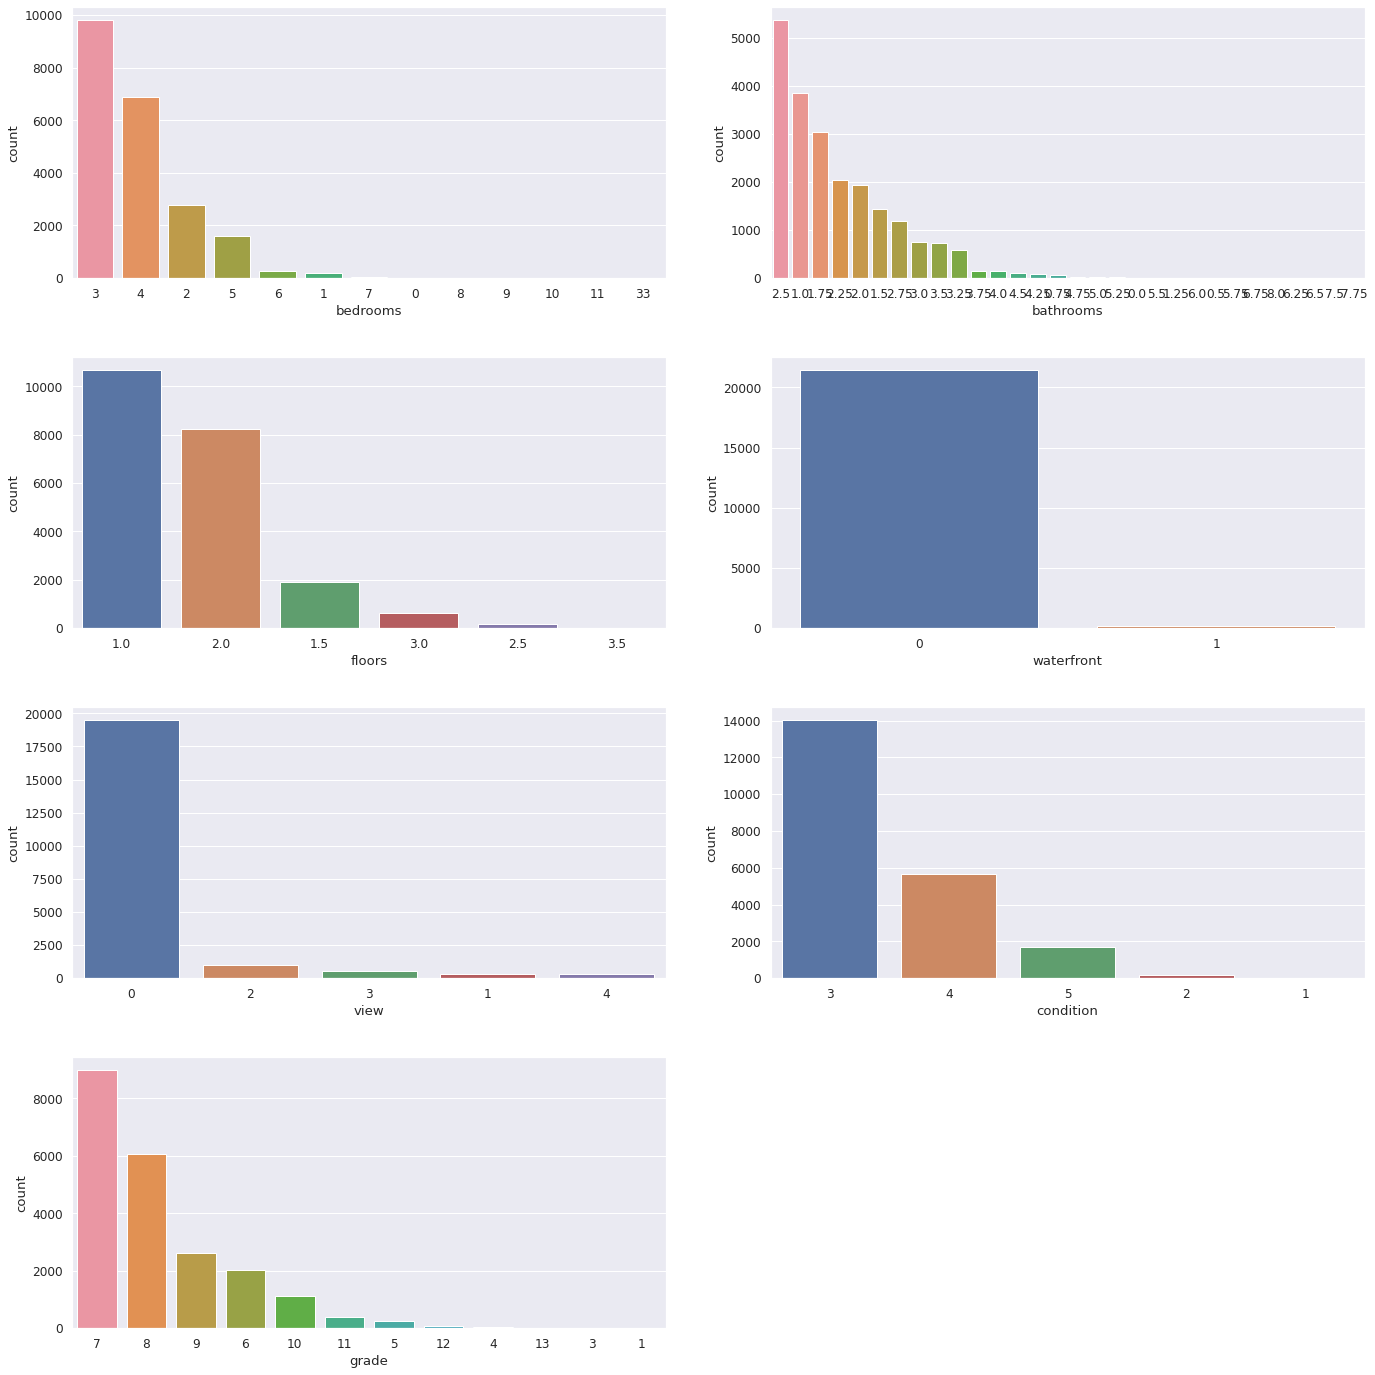

In [ ]:
countPlotter(plot_data)

In [ ]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['yr_built'], .25)
Q2 = np.quantile(df_new['yr_built'], .50)
Q3 = np.quantile(df_new['yr_built'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['yr_built'])
nilai_max = np.max(df_new['yr_built'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  1951.0
Kuartil 2 =  1975.0
Kuartil 3 =  1997.0
IQR =  46.0
IQR minimum =  1882.0
IQR maksimum =  2066.0
Nilai minimum data =  1900
Nilai maksimum data =  2015


In [ ]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Tidak ditemukan high outlier!


In [ ]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['yr_built']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 []
High outlier : 
 []


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

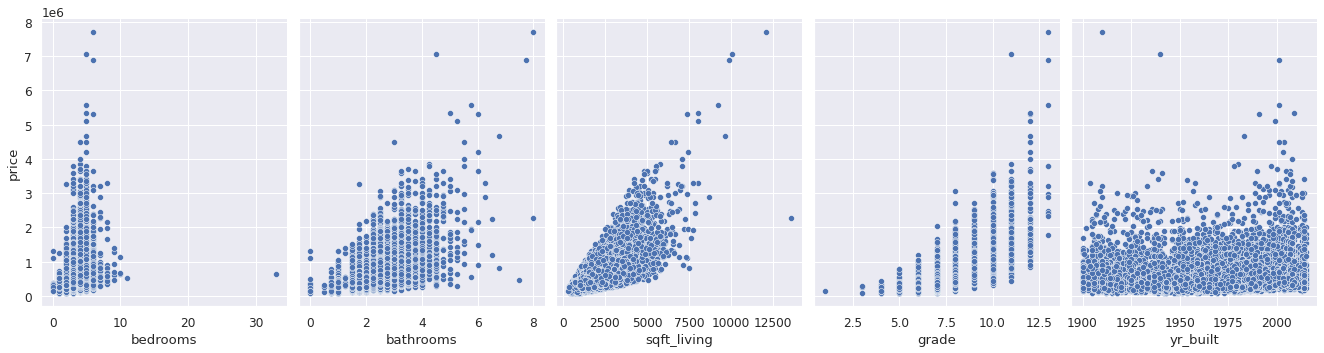

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_new, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [ ]:
df_new.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.31,0.53,0.70,0.67,0.05
bedrooms,0.31,1.00,0.52,0.58,0.36,0.15
bathrooms,0.53,0.52,1.00,0.75,0.66,0.51
sqft_living,0.70,0.58,0.75,1.00,0.76,0.32
grade,0.67,0.36,0.66,0.76,1.00,0.45
yr_built,0.05,0.15,0.51,0.32,0.45,1.00


**Variabel dengan korelasi tertinggi: grade,sqft_living, bathrooms, bedrooms **

## Machine Learning Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import tree, linear_model

In [ ]:
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built',
       'grade_cat', 'yr_built_cat'],
      dtype='object')

In [ ]:
df_final = df_new.drop(columns=['grade_cat', 'yr_built_cat'])
df_final.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [ ]:
X = df_final.loc[:, df_final.columns != 'price']
y = df_final['price']

### Splitting data to train and test datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
print("X_train\t:", X_train.shape)
print("y_train\t:", y_train.shape)
print("X_test\t:", X_test.shape)
print("y_test\t:", y_test.shape)

X_train	: (17288, 5)
y_train	: (17288,)
X_test	: (4323, 5)
y_test	: (4323,)


### 1. Multiple Linear Regression

In [ ]:
linreg_model = LinearRegression()

In [ ]:
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Slope/koefisien (b) =\n", linreg_model.coef_)
print("==========================================================")
print("Intercept (a) =\n", linreg_model.intercept_)

Slope/koefisien (b) =
 [-49922.79137394  58447.50272469    190.23193719 130296.81047765
  -4108.00012934]
Intercept (a) =
 7288694.748919456


In [ ]:
coef_dict = {
    'features' : X.columns,
    'coef_value' : linreg_model.coef_,
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-49922.791374
1,bathrooms,58447.502725
2,sqft_living,190.231937
3,grade,130296.810478
4,yr_built,-4108.000129


In [ ]:
y_test_pred_linreg = linreg_model.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = r2_score(y_test, y_test_pred_linreg)
def mape_value(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print('R:', np.sqrt(acc_linreg))
print('R^2:', acc_linreg)
print('Adjusted R^2:', 1 - (1-r2_score(y_test, y_test_pred_linreg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:', mean_absolute_error(y_test, y_test_pred_linreg))
print('MSE:', mean_squared_error(y_test, y_test_pred_linreg))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_linreg)))
print('MAPE:', mape_value(y_test, y_test_pred_linreg))

R: 0.7793956036981837
R^2: 0.6074575070640562
Adjusted R^2: 0.607002859747707
MAE: 144958.30672975595
MSE: 47735632725.16153
RMSE: 218484.85696990884
MAPE: 30.25316977375639


### Prediction with Case Study (Multiple Linear Regression)

Pada suatu hari, Hilman ingin membeli sebuah rumah. Namun, rumah yang dia inginkan setidaknya memenuhi kriteria sebagai berikut:
1. bedrooms = 3
2. bathrooms = 2
3. sqft_living = 1818 sqft
4. grade = 7
5. yr_built = 2000

In [ ]:
harga_rumah = linreg_model.predict([[
    3, # bedrooms
    2, # bathrooms
    1818, # sqft_living
    7, # grade
    2000, # year
]])
print(f"Jadi harga rumahnya yaitu = USD ${harga_rumah}")

Jadi harga rumahnya yaitu = USD $[297740.45671553]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Correlation Pearson

In [ ]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

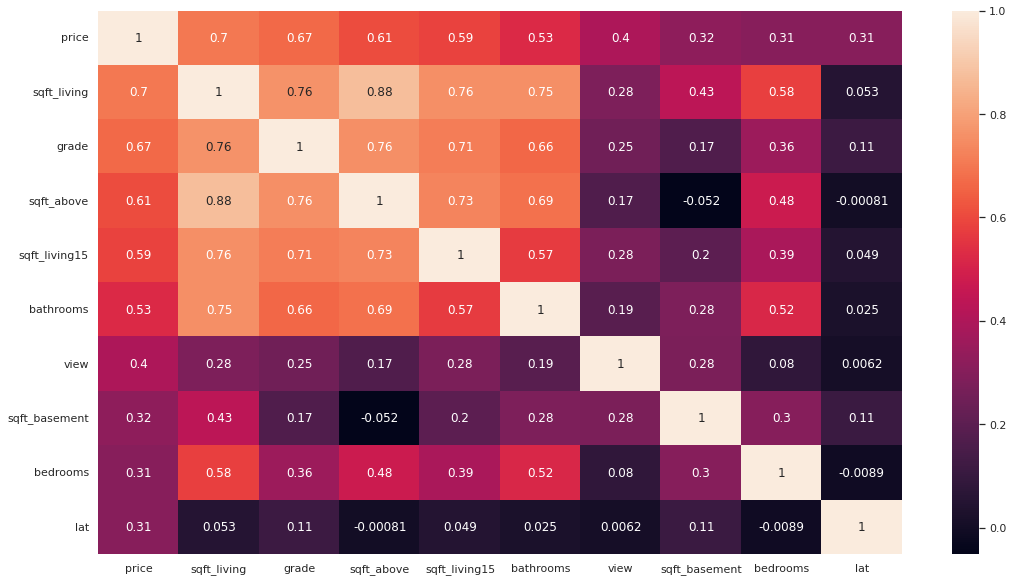

In [ ]:
plt.figure(figsize=(18,10))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, annot=True, yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [ ]:
#normalisasi data
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])

# Baseline algorithm test

In [ ]:
X1 = df[columns]
Y1 = X1['price'].values
X1 = X1.drop('price', axis = 1).values

In [ ]:
#data yang ditest sebesar 20% dr dataset
X1_train, X1_test, Y1_train, Y1_test = train_test_split (X1, Y1, test_size = 0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Skala raw data yang berbeda dapat mempengaruhi algoritma ini. Bagian dari persyaratan untuk kumpulan data standar adalah setiap atribut memiliki nilai rata-rata nol dan simpangan baku 1. Kami menerapkan standardisasi menggunakan pipeline. Kami kemudian menggunakan validasi silang untuk memvalidasi kinerja algoritma secara totalitas.

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBR', Pipeline([('Scaler', StandardScaler()),('GBR', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X1_train, Y1_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.075123 (0.002797)
ScaledLASSO: -0.276048 (0.010780)
ScaledEN: -0.276048 (0.010780)
ScaledKNN: -0.058035 (0.002397)
ScaledCART: -0.091318 (0.003827)
ScaledGBR: -0.045900 (0.001515)


Dari output di atas, sepertinya Gradient Boosting Regressor memiliki hasil terbaik karena memiliki Mean Squared Error terkecil. Seterusnya, kami akan membangun algoritma regresi menggunakan **Gradient Boosting Regressor**. GBR akan diuji dengan beberapa n_estimators menggunakan fungsi GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X1_train)
rescaledX = scaler.transform(X1_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y1_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.047991 (0.001631) with: {'n_estimators': 50}
-0.045902 (0.001501) with: {'n_estimators': 100}
-0.044988 (0.001661) with: {'n_estimators': 200}
-0.044710 (0.001731) with: {'n_estimators': 300}
-0.044548 (0.001778) with: {'n_estimators': 400}
Best: -0.044548 using {'n_estimators': 400}


Konfigurasi n_estimator terbaik adalah 400 dengan negatif mean square error mendekati 0.

# Validasi Model

In [ ]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X1_train)
rescaled_X_train = scaler.transform(X1_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, Y1_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X1_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y1_test, predictions))

0.046069306214221964


Dari mean square error Gradient Boosting Regressor 0,046 antara output prediksi vs data uji. Penting untuk dicatat bahwa mean_square_error dihitung menggunakan data yang diskalakan. 

In [ ]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y1_test})
compare.head(10)

,Prediction,Test Data
0,12.861933,12.807653
1,13.595659,13.670485
2,14.036059,13.852806
3,14.319927,14.214287
4,13.557086,13.474428
5,12.476558,12.259613
6,13.614558,13.579788
7,13.292049,13.429848
8,12.994364,12.859699
9,13.091224,13.312984


Dari output frame data di atas, perbedaan antara nilai prediksi dan data uji cukup kecil. Perhatikan bahwa data diskalakan dan log dinormalisasi. Jadi, kita harus membalikkan transformasi data ini untuk melihat nilai sebenarnya. Untuk melakukan itu, kami menerapkan fungsi **inverse_transform dan exp function** ke kolom "Prediksi"

In [ ]:
actual_y_test = np.exp(Y1_test)
actual_predicted = np.exp(predictions)
diff = abs(actual_y_test - actual_predicted)

compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Prediksi Harga' : actual_predicted, 'Selisih' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(10)

,Test Data,Prediksi Harga,Selisih
0,365000,385359,20359
1,865000,802638,62361
2,1038000,1246760,208760
3,1490000,1656018,166018
4,710999,772267,61267
5,211000,262119,51119
6,790000,817951,27951
7,680000,592465,87534
8,384499,439926,55426
9,604999,484670,120329
